# Booking .com web scrabing

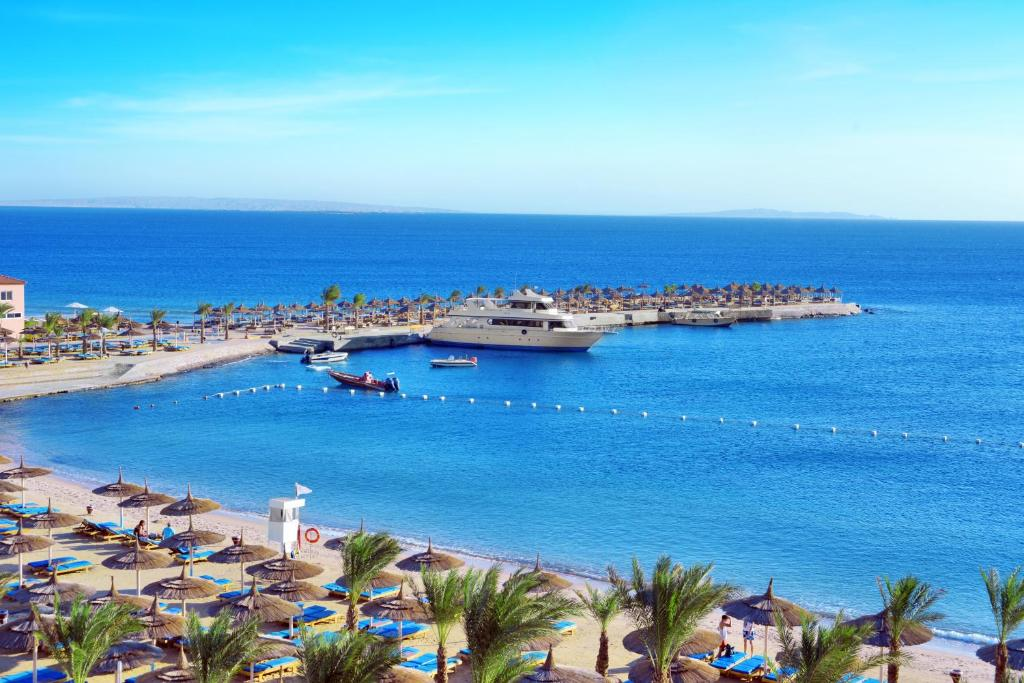

In [1]:
from IPython.display import Image, display

# display an image
display(Image(filename='D:/data sicece 2/44/MID-project/84325879.jpg'))

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
from selenium import webdriver

In [2]:
url = 'https://www.booking.com/searchresults.html?label=gen173bo-1DCAsoQ0IVYmVhY2gtYWxiYXRyb3MtcmVzb3J0SDNYA2hDiAEBmAExuAEXyAEM2AED6AEB-AEDiAIBmAICqAIDuAKC48m9BsACAdICJDIxNjU0OWUyLWQwOTEtNDgwMy1hMjY4LWJlODQ2M2RlOTY5M9gCBOACAQ&aid=304142&ss=Hurghada&ssne=Hurghada&ssne_untouched=Hurghada&highlighted_hotels=266446&efdco=1&lang=en-us&dest_id=-290029&dest_type=city&checkin=2025-02-20&checkout=2025-02-21&group_adults=2&no_rooms=1&group_children=0&nflt=class%3D5%3Bht_id%3D204%3Breview_score%3D90%3Bht_id%3D206%3Breview_score%3D80#map_closed'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response  = requests.get(url, headers=headers)

In [3]:
soup = BeautifulSoup(response.text, 'html.parser')


In [4]:
hotels = soup.findAll('div', {'data-testid': 'property-card'})

hotels_data = []
for hotel in hotels:
    # Extract the hotel name
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip() if name_element else 'N/A'

    # Extract the hotel location
    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip() if location_element else 'N/A'

    # Extract the hotel price
    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip() if price_element else 'N/A'
    
    # Extract the hotel rating
    rating_element = hotel.find('div', {'class': 'a3b8729ab1'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    
    hotels_data.append({
        'name': name,
        'location': location,
        'price': price,
        'rating': rating
    })
# Define the CSV file name
csv_file = 'hotels_data.csv'

# Write the data to a CSV file
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['name', 'location', 'price', 'rating'])
    writer.writeheader()  # Write the header
    writer.writerows(hotels_data)  # Write the hotel data

print(f"Data saved to {csv_file}")

Data saved to hotels_data.csv


# Booking.com Hotel Data Analysis

# Load the data into a DataFrame for visualization

In [5]:
hotels = pd.DataFrame(hotels_data)
hotels

name  \
0                 Beach Albatros Aqua Park - Hurghada   
1             Stella Gardens Resort & Spa, Makadi Bay   
2                                    The Grand Resort   
3   Pickalbatros Blu Spa Resort - Adults Friendly ...   
4           Pickalbatros Citadel Resort Sahl Hasheesh   
5                              Jaz Casa Del Mar Beach   
6   Hurghada Suites & Apartments Serviced by Marriott   
7          Pickalbatros White Beach Resort - Hurghada   
8                 Creek Hotel and Residences El Gouna   
9                      Caves Beach Resort Adults Only   
10                     Hurghada Marriott Beach Resort   
11                           Jaz Makadi Saraya Resort   
12                 Steigenberger Golf Resort El Gouna   
13                    Movenpick Resort & Spa El Gouna   
14                        Hilton Hurghada Plaza Hotel   
15            Steigenberger Aqua Magic, All inclusive   
16                              Jaz Aquamarine Resort   
17             The Oberoi Beach Resort, Sahl Hasheesh   
18                    Old Palace Resort Sahl Hasheesh   
19                   Casa Cook El Gouna - Adults Only   
20               Sunrise Holidays Resort -Adults Only   
21                      Sunrise Mamlouk Palace Resort   
22  Steigenberger Makadi - Adults Friendly 16 Year...   
23    Serenity Alpha Beach - Ex Serenity Makadi Beach   
24                           La Maison Bleue El Gouna   

                         location       price          rating  
0         Villages Road, Hurghada   EGP 6,660  Scored 9.4 9.4  
1            Makadi Bay, Hurghada   EGP 3,999  Scored 8.1 8.1  
2   Al Mamsha El Seyahi, Hurghada   EGP 5,266  Scored 8.8 8.8  
3   Al Mamsha El Seyahi, Hurghada   EGP 6,919  Scored 9.5 9.5  
4                        Hurghada   EGP 8,086  Scored 9.2 9.2  
5   Al Mamsha El Seyahi, Hurghada   EGP 6,713  Scored 9.2 9.2  
6   Al Mamsha El Seyahi, Hurghada   EGP 3,645  Scored 8.7 8.7  
7   Al Mamsha El Seyahi, Hurghada   EGP 6,997  Scored 9.5 9.5  
8              El Gouna, Hurghada   EGP 3,949  Scored 9.1 9.1  
9              Al Ahyaa, Hurghada   EGP 4,709  Scored 8.0 8.0  
10  Al Mamsha El Seyahi, Hurghada   EGP 4,810  Scored 8.4 8.4  
11           Makadi Bay, Hurghada   EGP 4,236  Scored 9.0 9.0  
12             El Gouna, Hurghada   EGP 6,873  Scored 8.7 8.7  
13             El Gouna, Hurghada   EGP 8,610  Scored 8.3 8.3  
14                       Hurghada   EGP 5,104  Scored 8.7 8.7  
15  Al Mamsha El Seyahi, Hurghada   EGP 6,343  Scored 8.5 8.5  
16        Villages Road, Hurghada   EGP 7,234  Scored 8.9 8.9  
17                       Hurghada   EGP 7,935  Scored 9.4 9.4  
18        Sahl Hasheesh, Hurghada   EGP 3,732  Scored 8.8 8.8  
19             El Gouna, Hurghada   EGP 8,962  Scored 9.1 9.1  
20                       Hurghada   EGP 5,124  Scored 9.2 9.2  
21        Villages Road, Hurghada   EGP 6,837  Scored 9.3 9.3  
22           Makadi Bay, Hurghada   EGP 4,771  Scored 9.0 9.0  
23           Makadi Bay, Hurghada   EGP 5,506  Scored 9.2 9.2  
24             El Gouna, Hurghada  EGP 17,686  Scored 9.7 9.7

https://www.booking.com/searchresults.ar.html?label=ar-eg-booking-desktop-JY5PJ4*shiSz*w9OdP6MHwS652897951130%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp1028889%3Ali%3Adec%3Adm&sid=e86f2c744ca1a32e57bb8bbbff052931&aid=2311236&age=5&checkin_monthday=25&checkin_year_month=2024-04&checkout_monthday=26&checkout_year_month=2024-04&dest_id=-290029&dest_type=city&from_history=1&group_adults=2&group_children=1&highlighted_hotels=10714107&lsuihh=1&no_rooms=1&order=popularity&sb_travel_purpose=leisure&si=ad&si=ai&si=ci&si=co&si=di&si=la&si=re&sh_position=1&offset=25

In [10]:
print(hotels.dtypes)

name        object
location    object
price       object
rating      object
dtype: object


In [11]:
hotels['price'] = pd.to_numeric(hotels['price'].str.replace('EGP', '').str.replace(',', '').str.strip(), errors='coerce')

In [12]:
# Convert to string first if necessary
hotels['price'] = hotels['price'].astype(str)

# Now perform the string replacements and convert to numeric
hotels['price'] = pd.to_numeric(
    hotels['price'].str.replace('EGP', '').str.replace(',', '').str.strip(),
    errors='coerce'
)

In [13]:
print(hotels['price'].isnull().sum())

0


In [14]:
p=r'hotels'
with open(p, 'w',encoding='utf-8',newline='') as csvfile:
                csvwriter = csv.writer(csvfile, delimiter=',')
                csvwriter.writerow(['name','price'])

# price vs rating

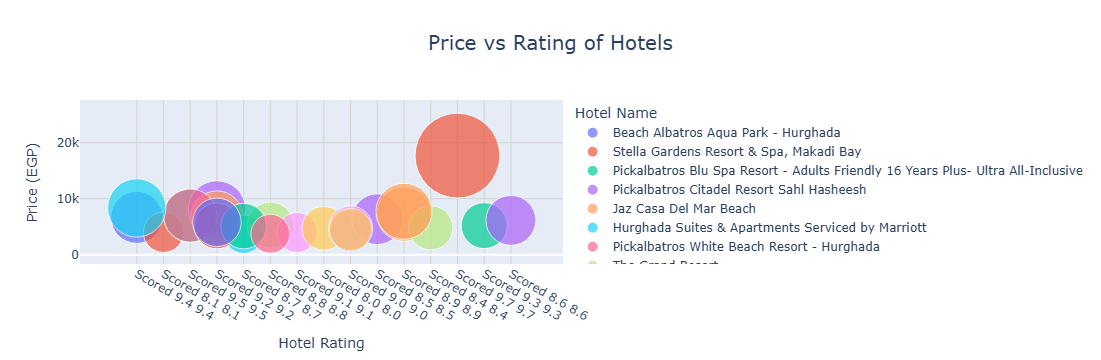

In [17]:
import plotly.express as px

# Ensure that there are no NaN values in the relevant columns
df = hotels.dropna(subset=['price', 'rating'])

# Create a scatter plot for price vs rating
fig_scatter = px.scatter(
    hotels,
    x='rating',
    y='price',
    size='price',
    color='name',
    hover_name='location',
    title='Price vs Rating of Hotels',
    labels={'rating': 'Hotel Rating', 'price': 'Price (EGP)'},
    size_max=60,  # Maximum size of the markers
    color_continuous_scale=px.colors.sequential.Viridis,  # Color scale
    trendline='ols'  # Add a trendline (ordinary least squares)
)

# Update layout for better aesthetics
fig_scatter.update_layout(
    xaxis_title='Hotel Rating',
    yaxis_title='Price (EGP)',
    legend_title='Hotel Name',
    title_x=0.5,  # Center the title
    title_font=dict(size=20),  # Increase title font size
    xaxis=dict(showgrid=True, gridcolor='LightGray'),  # Add gridlines
    yaxis=dict(showgrid=True, gridcolor='LightGray')
)

# Display the scatter plot
fig_scatter.show()





# Top-rated hotels

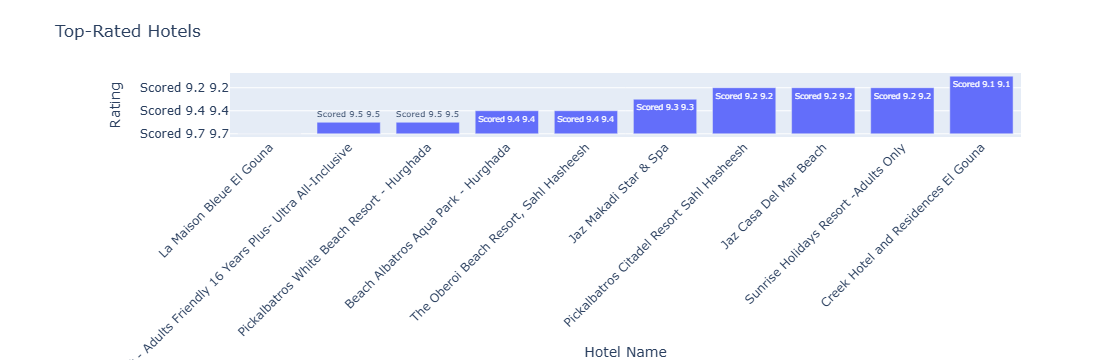

In [16]:
# Analysis 1: Top-rated hotels
top_rated = hotels.sort_values(by='rating', ascending=False).head(10)
fig_top_rated = px.bar(
    top_rated, 
    x='name', 
    y='rating', 
    title='Top-Rated Hotels',
    labels={'name': 'Hotel Name', 'rating': 'Rating'},
    text='rating'
)
fig_top_rated.update_layout(xaxis_tickangle=-45)


# Average price by hotels

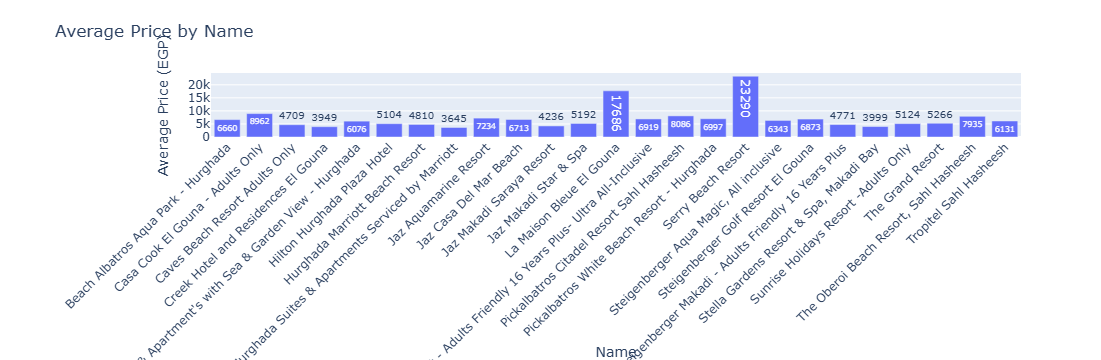

In [17]:
# Analysis 4: Average price by hotels
avg_price_by_location = hotels.groupby('name')['price'].mean().reset_index()
fig_avg_price = px.bar(
    avg_price_by_location,
    x='name',
    y='price',
    title='Average Price by Name',
    labels={'name': 'Name', 'price': 'Average Price (EGP)'},
    text='price'
)
fig_avg_price.update_layout(xaxis_tickangle=-45)

# Top hotels positive Reviews

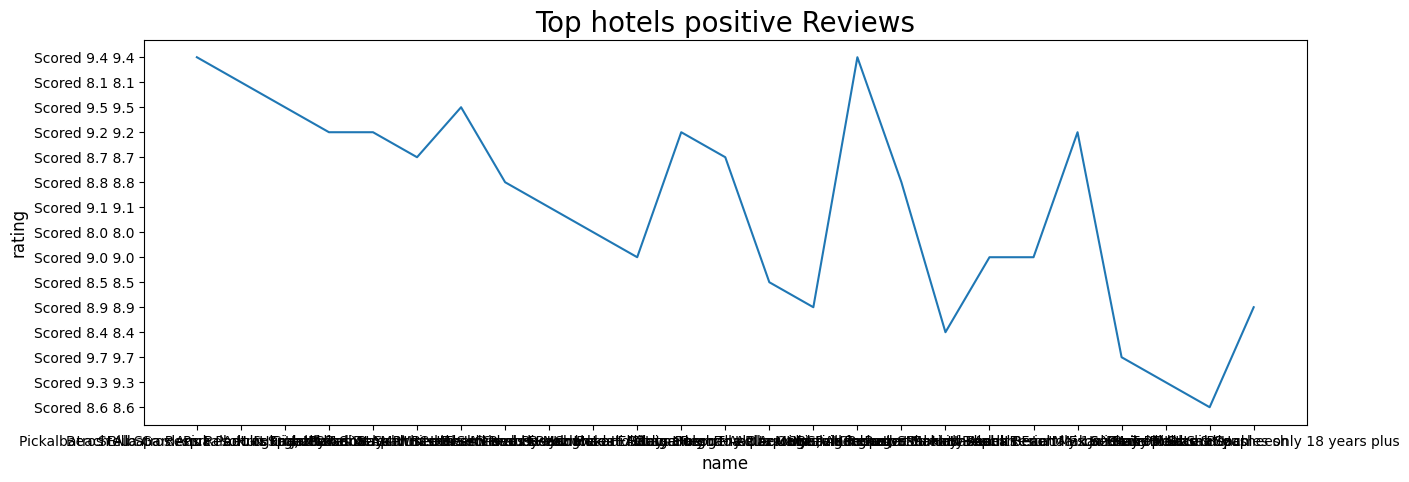

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.DataFrame(hotels)

# Setting the chart size
plt.figure(figsize=(15, 5))

# Plotting the values in a line chart
sns.lineplot(data=df, x='name', y='rating') 

# Setting the labels and title
plt.title('Top hotels positive Reviews', fontsize=20)
plt.xlabel('name', fontsize=12)
plt.ylabel('rating', fontsize=12)

# Show chart
plt.show()

# Price # Value

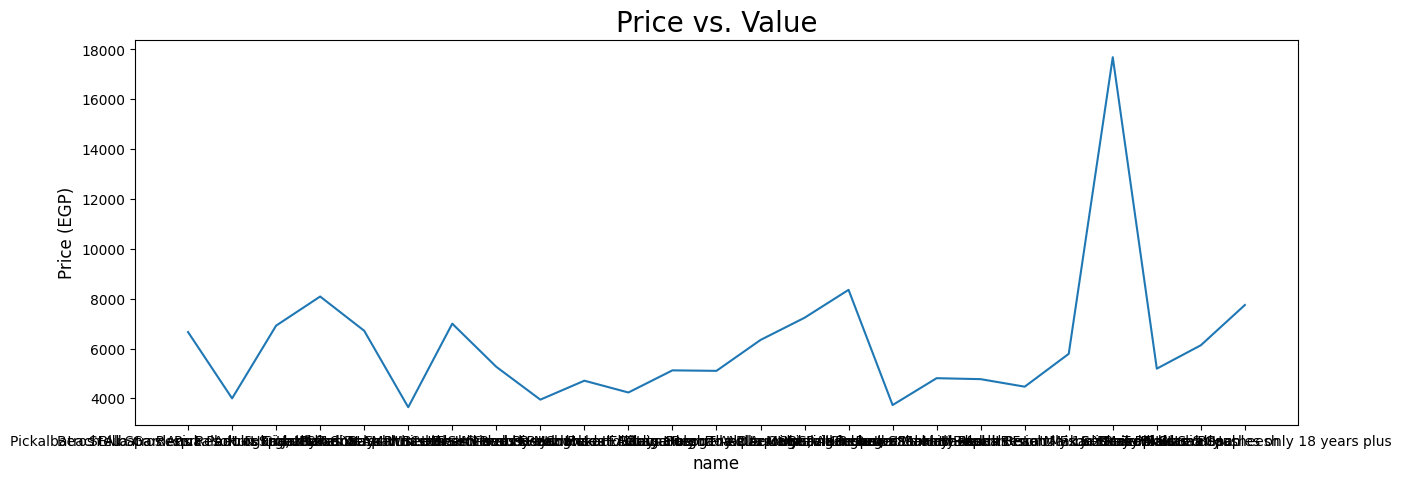

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)

df = pd.DataFrame(hotels)

# Setting the chart size
plt.figure(figsize=(15, 5))

# Plotting the values in a line chart
sns.lineplot(data=df, x='name', y='price') 

# Setting the labels and title
plt.title('Price vs. Value', fontsize=20)
plt.xlabel('name', fontsize=12)
plt.ylabel('Price (EGP)', fontsize=12)

# Show chart
plt.show()

# hotels prices

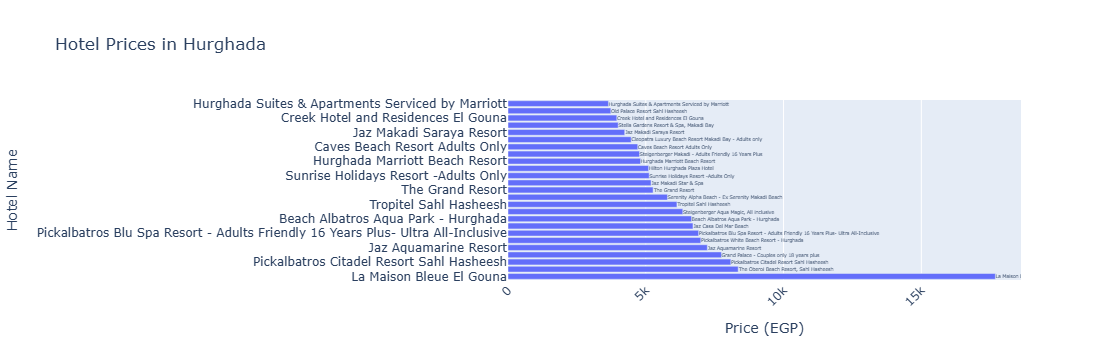

In [50]:
# Visualization: Create a bar chart for hotel prices
fig_price = px.bar(
    hotels.sort_values(by='price', ascending=False),
    x='price', 
    y='name', 
    title='Hotel Prices in Hurghada',
    labels={'name': 'Hotel Name', 'price': 'Price (EGP)'},
    text='name'
)
fig_price.update_layout(xaxis={'categoryorder': 'sum descending'}, xaxis_tickangle=-45)


# hotels rating

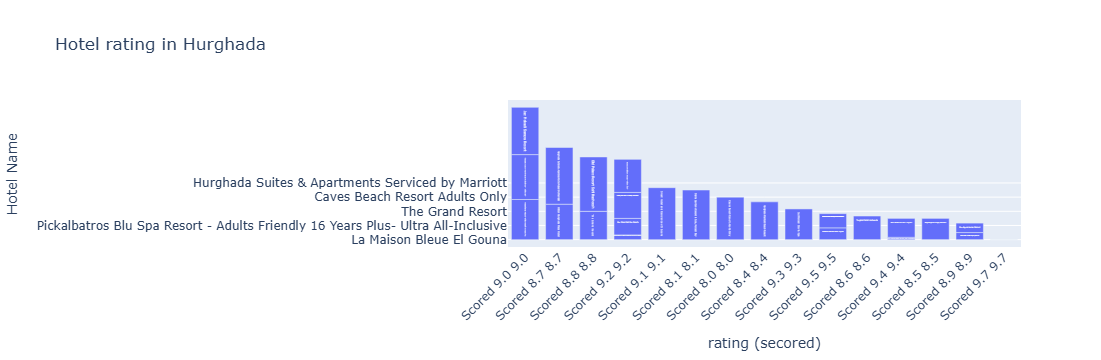

In [52]:
# Visualization: Create a bar chart for hotel rating
fig_price = px.bar(
    hotels.sort_values(by='price', ascending=False),
    x='rating', 
    y='name', 
    title='Hotel rating in Hurghada',
    labels={'name': 'Hotel Name', 'rating': 'rating (secored)'},
    text='name'
)
fig_price.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45)

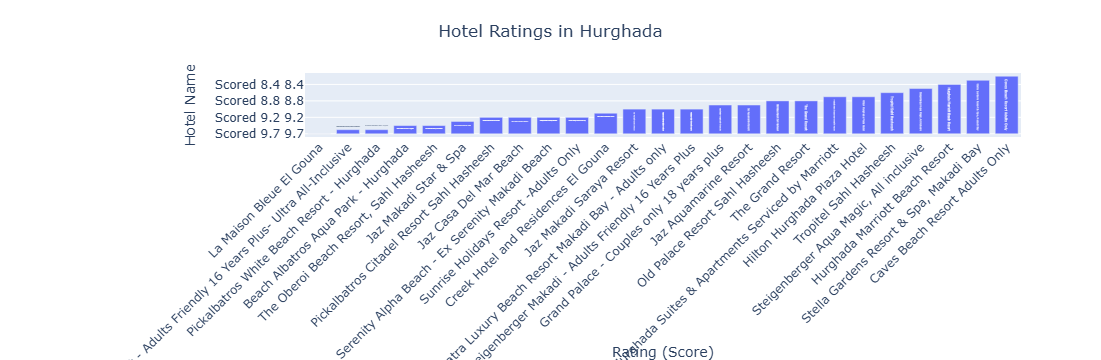

In [53]:
# Visualization: Create a bar chart for hotel rating
fig_price = px.bar(
    hotels.sort_values(by='rating', ascending=False),  # Sort by rating
    x='name', 
    y='rating', 
    title='Hotel Ratings in Hurghada',
    labels={'name': 'Hotel Name', 'rating': 'Rating (Score)'},
    text='name'
)

# Update layout for better aesthetics
fig_price.update_layout(
    xaxis={'categoryorder': 'total ascending'},  # Corrected category order
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    yaxis_title='Hotel Name',
    xaxis_title='Rating (Score)',
    title_x=0.5  # Center the title
)

# Display the bar chart
fig_price.show()

In [56]:
import seaborn as sns

In [127]:
!pip install folium


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
!pip install folium geopy



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [162]:
hotels

name  \
0                 Beach Albatros Aqua Park - Hurghada   
1             Stella Gardens Resort & Spa, Makadi Bay   
2                    Casa Cook El Gouna - Adults Only   
3                  Steigenberger Golf Resort El Gouna   
4                                    The Grand Resort   
5   El Gouna Elite Private Villa's & Apartment's w...   
6                Sunrise Holidays Resort -Adults Only   
7                         Hilton Hurghada Plaza Hotel   
8             Steigenberger Aqua Magic, All inclusive   
9                     Old Palace Resort Sahl Hasheesh   
10          Grand Palace - Couples only 18 years plus   
11                           Jaz Makadi Saraya Resort   
12                         Hurghada Long Beach Resort   
13                                       Jaz Makadina   
14                              Jaz Makadi Star & Spa   
15             The Oberoi Beach Resort, Sahl Hasheesh   
16                              Jaz Aquamarine Resort   
17                      Palm Royale Resort - Soma Bay   
18                      Sunrise Mamlouk Palace Resort   
19                            Jaz Makadi Oasis Resort   
20                         Continental Hotel Hurghada   
21                Creek Hotel and Residences El Gouna   
22           Sunrise Crystal Bay Resort -Grand Select   
23                   Sheraton Miramar Resort El Gouna   
24                            Calimera Blend Paradise   

                         location      price          rating  
0         Villages Road, Hurghada  EGP 6,660  Scored 9.4 9.4  
1            Makadi Bay, Hurghada  EGP 3,999  Scored 8.1 8.1  
2              El Gouna, Hurghada  EGP 8,962  Scored 9.1 9.1  
3              El Gouna, Hurghada  EGP 6,873  Scored 8.7 8.7  
4   Al Mamsha El Seyahi, Hurghada  EGP 5,266  Scored 8.8 8.8  
5              El Gouna, Hurghada  EGP 6,076  Scored 8.9 8.9  
6                        Hurghada  EGP 5,124  Scored 9.2 9.2  
7                        Hurghada  EGP 5,104  Scored 8.7 8.7  
8   Al Mamsha El Seyahi, Hurghada  EGP 5,461  Scored 8.5 8.5  
9         Sahl Hasheesh, Hurghada  EGP 3,732  Scored 8.8 8.8  
10  Al Mamsha El Seyahi, Hurghada  EGP 7,746  Scored 8.9 8.9  
11           Makadi Bay, Hurghada  EGP 4,236  Scored 9.0 9.0  
12        Villages Road, Hurghada  EGP 3,438  Scored 9.1 9.1  
13           Makadi Bay, Hurghada  EGP 5,996  Scored 9.4 9.4  
14           Makadi Bay, Hurghada  EGP 5,192  Scored 9.3 9.3  
15                       Hurghada  EGP 7,935  Scored 9.4 9.4  
16        Villages Road, Hurghada  EGP 6,850  Scored 8.9 8.9  
17             Soma Bay, Hurghada  EGP 8,754  Scored 8.8 8.8  
18        Villages Road, Hurghada  EGP 6,837  Scored 9.3 9.3  
19           Makadi Bay, Hurghada  EGP 4,520  Scored 8.9 8.9  
20  Al Mamsha El Seyahi, Hurghada  EGP 6,757  Scored 8.6 8.6  
21             El Gouna, Hurghada  EGP 3,949  Scored 9.1 9.1  
22        Villages Road, Hurghada  EGP 5,557  Scored 9.3 9.3  
23             El Gouna, Hurghada  EGP 7,974  Scored 8.3 8.3  
24        Villages Road, Hurghada  EGP 5,105  Scored 8.5 8.5

# Hoels by location 

In [174]:
import folium
import pandas as pd

# Example hotel data with corrected coordinates
hotels = [
    {"name": "Beach Albatros Aqua Park - Hurghada", "latitude": 27.1985, "longitude": 33.8116},
    {"name": "Stella Gardens Resort & Spa, Makadi Bay", "latitude": 26.9860, "longitude": 33.9660},
    {"name": "Casa Cook El Gouna - Adults Only", "latitude": 26.8500, "longitude": 33.6833},
    {"name": "Steigenberger Golf Resort El Gouna", "latitude": 26.8500, "longitude": 33.6833},
    {"name": "The Grand Resort", "latitude": 27.1930, "longitude": 33.8110},
    {"name": "El Gouna Elite Private Villa's & Apartment's", "latitude": 26.8500, "longitude": 33.6833},
    {"name": "Sunrise Holidays Resort - Adults Only", "latitude": 27.1985, "longitude": 33.8116},
    {"name": "Hilton Hurghada Plaza Hotel", "latitude": 27.1985, "longitude": 33.8116},
    {"name": "Steigenberger Aqua Magic, All inclusive", "latitude": 27.1985, "longitude": 33.8116},
    {"name": "Old Palace Resort Sahl Hasheesh", "latitude": 26.9770, "longitude": 33.8110},
    {"name": "Grand Palace - Couples only 18 years plus", "latitude": 27.1985, "longitude": 33.8116},
    {"name": "Jaz Makadi Saraya Resort", "latitude": 26.9860, "longitude": 33.9660},
    {"name": "Hurghada Long Beach Resort", "latitude": 27.1985, "longitude": 33.8116},
    {"name": "Jaz Makadina", "latitude": 26.9860, "longitude": 33.9660},
    {"name": "Jaz Makadi Star & Spa", "latitude": 26.9860, "longitude": 33.9660},
    {"name": "The Oberoi Beach Resort, Sahl Hasheesh", "latitude": 26.9770, "longitude": 33.8110},
    {"name": "Jaz Aquamarine Resort", "latitude": 27.1985, "longitude": 33.8116},
    {"name": "Palm Royale Resort", "latitude": 27.1985, "longitude": 33.8116},
    {"name": "Sunrise Mamlouk Palace Resort", "latitude": 27.1985, "longitude": 33.8116},
    {"name": "Jaz Makadi Oasis Resort", "latitude": 26.9860, "longitude": 33.9660},
    {"name": "Continental Hotel Hurghada", "latitude": 27.1985, "longitude": 33.8116},
    {"name": "Creek Hotel and Residences El Gouna", "latitude": 26.8500, "longitude": 33.6833},
    {"name": "Sunrise Crystal Bay Resort - Grand Select", "latitude": 27.1985, "longitude": 33.8116},
    {"name": "Sheraton Miramar Resort El Gouna", "latitude": 26.8500, "longitude": 33.6833},
    {"name": "Calimera Blend Paradise", "latitude": 27.1985, "longitude": 33.8116},
]

# Create a DataFrame from the hotel data
df = pd.DataFrame(hotels)

# Check the DataFrame structure
print(df)

# Create a map centered at the average location
map_center = [df['latitude'].mean(), df['longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=10)

# Add markers to the map
for index, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],  # Use separate latitude and longitude
        popup=row['name'],
        icon=folium.Icon(color='blue')
    ).add_to(my_map)

# Display the map
my_map

                                            name  latitude  longitude
0            Beach Albatros Aqua Park - Hurghada   27.1985    33.8116
1        Stella Gardens Resort & Spa, Makadi Bay   26.9860    33.9660
2               Casa Cook El Gouna - Adults Only   26.8500    33.6833
3             Steigenberger Golf Resort El Gouna   26.8500    33.6833
4                               The Grand Resort   27.1930    33.8110
5   El Gouna Elite Private Villa's & Apartment's   26.8500    33.6833
6          Sunrise Holidays Resort - Adults Only   27.1985    33.8116
7                    Hilton Hurghada Plaza Hotel   27.1985    33.8116
8        Steigenberger Aqua Magic, All inclusive   27.1985    33.8116
9                Old Palace Resort Sahl Hasheesh   26.9770    33.8110
10     Grand Palace - Couples only 18 years plus   27.1985    33.8116
11                      Jaz Makadi Saraya Resort   26.9860    33.9660
12                    Hurghada Long Beach Resort   27.1985    33.8116
13                  

In [2]:
%%writefile booking.py
import streamlit as st
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the Streamlit page configuration
st.set_page_config(
    layout="wide",
    page_title="Booking.com Hotel Data Analysis"
)

# Load the hotel data
hotels_df = pd.read_csv("hotels_data.csv")

# Convert the 'price' column to numeric, handling errors
hotels_df['price'] = pd.to_numeric(
    hotels_df['price'].str.replace('EGP', '').str.replace(',', '').str.strip(),
    errors='coerce'
)

# Convert the 'rating' column to numeric, handling errors
hotels_df['rating'] = pd.to_numeric(
    hotels_df['rating'].str.extract('(\d+\.\d+)')[0],
    errors='coerce'
)

# Drop rows with NaN values in 'price' or 'rating'
hotels_df = hotels_df.dropna(subset=['price', 'rating'])

st.title("Booking.com Hotel Data Analysis")
st.sidebar.header("Filters")

# Sidebar filters
min_price, max_price = st.sidebar.slider(
    "Price Range (EGP)", 
    min_value=0.0, 
    max_value=float(hotels_df['price'].max() or 0), 
    value=(0.0, float(hotels_df['price'].max() or 0))
)

min_rating, max_rating = st.sidebar.slider(
    "Rating Range", 
    min_value=0.0, 
    max_value=10.0, 
    value=(0.0, 10.0)
)

selected_locations = st.sidebar.multiselect(
    "Select Locations", 
    options=hotels_df['location'].unique(), 
    default=hotels_df['location'].unique()
)

# Apply filters
filtered_df = hotels_df[
    (hotels_df['price'] >= min_price) &
    (hotels_df['price'] <= max_price) &
    (hotels_df['rating'] >= min_rating) &
    (hotels_df['rating'] <= max_rating) &
    (hotels_df['location'].isin(selected_locations))
]

# Display filtered data
st.subheader("Filtered Hotels Data")
st.dataframe(filtered_df)

# Analysis 1: Top-rated hotels
st.subheader("Top-Rated Hotels")
top_rated = filtered_df.sort_values(by="rating", ascending=False).head(10)
fig_top_rated = px.bar(
    top_rated, 
    x="name", 
    y="rating", 
    title="Top-Rated Hotels",
    labels={"name": "Hotel Name", "rating": "Rating"},
    text="rating"
)
fig_top_rated.update_layout(xaxis_tickangle=-45)
st.plotly_chart(fig_top_rated)

# Analysis 2: Price distribution
st.subheader("Price Distribution")
fig_price_dist = px.histogram(
    filtered_df,
    x="price",
    nbins=10,
    title="Price Distribution of Hotels",
    labels={"price": "Price (EGP)"}
)
st.plotly_chart(fig_price_dist)

# Analysis 3: Rating vs. Price
st.subheader("Rating vs. Price Analysis")
fig_rating_vs_price = px.scatter(
    filtered_df,
    x="rating",
    y="price",
    size="price",
    color="name",
    hover_name="name",
    title="Rating vs. Price Analysis",
    labels={"rating": "Hotel Rating", "price": "Price (EGP)"}
)
st.plotly_chart(fig_rating_vs_price)

# Analysis 4: Average price by hotel
st.subheader("Average Price by Hotel")
avg_price_by_hotel = filtered_df.groupby("name")["price"].mean().reset_index()
fig_avg_price = px.bar(
    avg_price_by_hotel,
    x="name",
    y="price",
    title="Average Price by Hotel",
    labels={"name": "Hotel Name", "price": "Average Price (EGP)"},
    text="price"
)
fig_avg_price.update_layout(xaxis_tickangle=-45)
st.plotly_chart(fig_avg_price)

# Analysis 5: Top-rated budget hotels
st.subheader("Top-Rated Budget Hotels")
budget_hotels = filtered_df[filtered_df['price'] < filtered_df['price'].mean()]
top_budget_rated = budget_hotels.sort_values(by="rating", ascending=False).head(10)
fig_budget_rated = px.bar(
    top_budget_rated, 
    x="name", 
    y="rating", 
    title="Top-Rated Budget Hotels",
    labels={"name": "Hotel Name", "rating": "Rating"},
    text="rating"
)
fig_budget_rated.update_layout(xaxis_tickangle=-45)
st.plotly_chart(fig_budget_rated)

# Seaborn/Matplotlib Analysis 1: Line chart for ratings
st.subheader("Line Chart: Hotel Ratings")
fig1, ax1 = plt.subplots(figsize=(15, 5))
sns.lineplot(data=filtered_df, x='name', y='rating', ax=ax1)
ax1.set_title('Top Hotels Positive Reviews', fontsize=20)
ax1.set_xlabel('Hotel Name', fontsize=12)
ax1.set_ylabel('Rating', fontsize=12)
plt.xticks(rotation=45)
st.pyplot(fig1)

# Seaborn/Matplotlib Analysis 2: Line chart for prices
st.subheader("Line Chart: Price vs. Value")
fig2, ax2 = plt.subplots(figsize=(15, 5))
sns.lineplot(data=filtered_df, x='name', y='price', ax=ax2)
ax2.set_title('Price vs. Value', fontsize=20)
ax2.set_xlabel('Hotel Name', fontsize=12)
ax2.set_ylabel('Price (EGP)', fontsize=12)
plt.xticks(rotation=45)
st.pyplot(fig2)

# Analysis 6: Bar chart for hotel ratings in Hurghada
st.subheader("Hotel Ratings in Hurghada")
fig_price = px.bar(
    filtered_df.sort_values(by='rating', ascending=False),  # Sort by rating
    x='name', 
    y='rating', 
    title='Hotel Ratings in Hurghada',
    labels={'name': 'Hotel Name', 'rating': 'Rating (Score)'},
    text='name'
)
# Update layout for better aesthetics
fig_price.update_layout(
    xaxis={'categoryorder': 'total ascending'},
    xaxis_tickangle=-45,
    xaxis_title='Hotel Name',
    yaxis_title='Rating (Score)',
    title_x=0.5
)
st.plotly_chart(fig_price)

st.success("Analysis Complete!")


Overwriting booking.py


In [ ]:
!streamlit run booking.py